In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key = '8b4dc8427082d9ecb180cb2840316df12aa25f67')

In [3]:
df.to_csv('/content/drive/MyDrive/Stock Prediction/Notebooks/AAPL.csv')

In [4]:
df.tail()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2021-06-09 00:00:00+00:00  127.13  127.75  ...      0.0          1.0
       2021-06-10 00:00:00+00:00  126.11  128.19  ...      0.0          1.0
       2021-06-11 00:00:00+00:00  127.35  127.44  ...      0.0          1.0
       2021-06-14 00:00:00+00:00  130.48  130.54  ...      0.0          1.0
       2021-06-15 00:00:00+00:00  129.64  130.60  ...      0.0          1.0

[5 rows x 12 columns]

In [5]:
import pandas as pd

In [6]:
df1 = df.reset_index()['close']

In [7]:
df1.head()

0    95.33
1    95.10
2    95.91
3    95.55
4    96.10
Name: close, dtype: float64

In [8]:
len(df1)

1257

In [9]:
import matplotlib.pyplot as plt

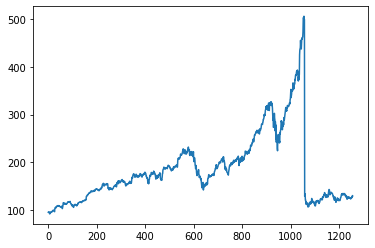

In [10]:
plt.plot(df1)

LSTM is sensitive to scale of data, so we apply MinMax Scaler

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [14]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [15]:
df1.shape

(1257, 1)

In [16]:
 training_size = int(len(df1) * 0.65)
 test_size = len(df1) - training_size
 train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [17]:
import numpy as np

def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step -1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  
  return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

Before creating an LSTM model, we need to reshape our data

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Creating a stacked LSTM Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(LSTM(256, return_sequences=False, input_shape = (100, 1)))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 266,257
Trainable params: 266,257
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 64, verbose = 2) 

Epoch 1/25
12/12 - 6s - loss: 6.9125e-04 - mae: 0.0215 - val_loss: 0.0127 - val_mae: 0.0706
Epoch 2/25
12/12 - 6s - loss: 4.8543e-04 - mae: 0.0174 - val_loss: 0.0081 - val_mae: 0.0471
Epoch 3/25
12/12 - 6s - loss: 2.0057e-04 - mae: 0.0110 - val_loss: 0.0076 - val_mae: 0.0329
Epoch 4/25
12/12 - 6s - loss: 1.4084e-04 - mae: 0.0089 - val_loss: 0.0077 - val_mae: 0.0272
Epoch 5/25
12/12 - 6s - loss: 1.3984e-04 - mae: 0.0087 - val_loss: 0.0077 - val_mae: 0.0263
Epoch 6/25
12/12 - 6s - loss: 1.4446e-04 - mae: 0.0089 - val_loss: 0.0074 - val_mae: 0.0275
Epoch 7/25
12/12 - 6s - loss: 1.2754e-04 - mae: 0.0081 - val_loss: 0.0072 - val_mae: 0.0283
Epoch 8/25
12/12 - 6s - loss: 1.2394e-04 - mae: 0.0081 - val_loss: 0.0072 - val_mae: 0.0271
Epoch 9/25
12/12 - 6s - loss: 1.2540e-04 - mae: 0.0081 - val_loss: 0.0070 - val_mae: 0.0284
Epoch 10/25
12/12 - 6s - loss: 1.2849e-04 - mae: 0.0082 - val_loss: 0.0069 - val_mae: 0.0285
Epoch 11/25
12/12 - 6s - loss: 1.2261e-04 - mae: 0.0080 - val_loss: 0.0069 - va

## Prediction and checking performance metrics

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [34]:
train_predict.shape

(716, 1)

In [35]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#### Calculate RMSE

In [36]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

174.1792686543401

In [37]:
math.sqrt(mean_squared_error(y_test, test_predict))

241.78282959773244

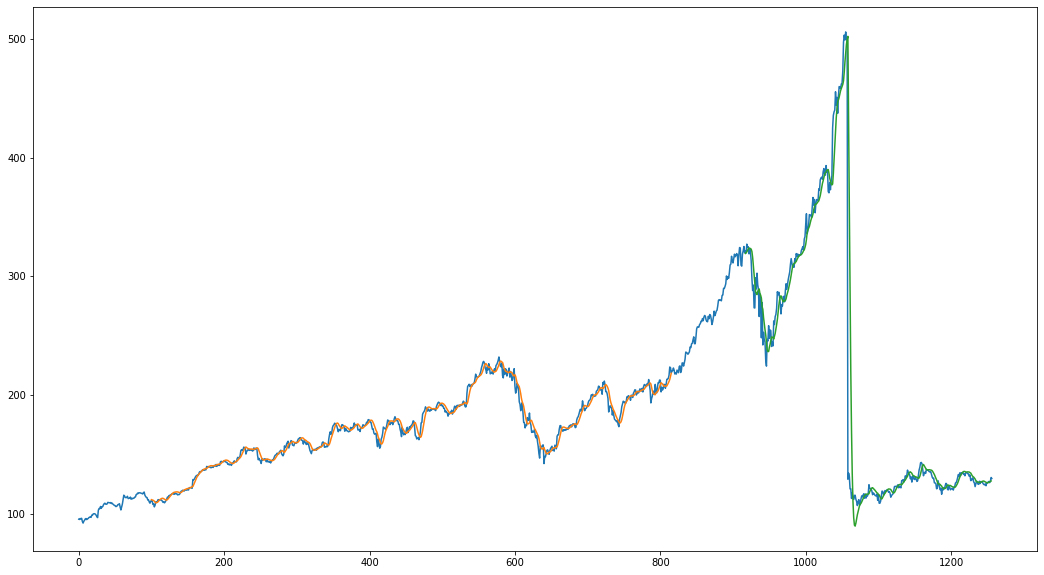

In [38]:
look_back = 100
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift Test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(18, 10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.11358531578311795,
 0.12288370969689646,
 0.12346334983697618,
 0.1208066658616109,
 0.10880328462746044,
 0.09641347663325686,
 0.10167854123898076,
 0.10373143340176308,
 0.10119550778891437,
 0.10952783480256004,
 0.10800627943485083,
 0.10836855452240066,
 0.10619490399710177,
 0.10469750030189587,
 0.10406955681680954,
 0.10464919695688926,
 0.0993841323511653,
 0.09370848931288492,
 0.09097935032000967,
 0.0913657770800628,
 0.08201907982127762,
 0.0816809564062311,
 0.08044922110856176,
 0.06991909189711384,
 0.07057118705470353,
 0.0863422291993721,
 0.0798937326409854,
 0.07250332085496922,
 0.06784204806182828,
 0.07095761381475665,
 0.0587368675280763,
 0.07014853278589542,
 0.06747977297427846,
 0.07226180412993596,
 0.07001569858712717,
 0.0771645936481101,
 0.08098055790363481,
 0.07902427243086582,
 0.06880811496196113,
 0.06750392464678176,
 0.07571549329791086,
 0.0736626011351286,
 0.06774544137181501,
 0.06895302499698105,
 0.0704504286921869,
 0.07088515879724669

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):

        # print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08778268]
101
1 day input [0.12288371 0.12346335 0.12080667 0.10880328 0.09641348 0.10167854
 0.10373143 0.10119551 0.10952783 0.10800628 0.10836855 0.1061949
 0.1046975  0.10406956 0.1046492  0.09938413 0.09370849 0.09097935
 0.09136578 0.08201908 0.08168096 0.08044922 0.06991909 0.07057119
 0.08634223 0.07989373 0.07250332 0.06784205 0.07095761 0.05873687
 0.07014853 0.06747977 0.0722618  0.0700157  0.07716459 0.08098056
 0.07902427 0.06880811 0.06750392 0.07571549 0.0736626  0.06774544
 0.06895302 0.07045043 0.07088516 0.06728656 0.07272069 0.07477358
 0.08177756 0.08252626 0.0866079  0.09254921 0.09891317 0.09467456
 0.10237894 0.09658254 0.102548   0.10172684 0.10336916 0.09919092
 0.10013283 0.09636517 0.10211327 0.10307934 0.10228233 0.10032605
 0.10008453 0.09520589 0.09781427 0.08648714 0.08709093 0.09105181
 0.09218693 0.08407197 0.08180171 0.07421809 0.07953146 0.08552107
 0.08267117 0.07924164 0.07885521 0.08518295 0.08064243 0.08467576
 0.08419273 0.08407197 0.08028016 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1257

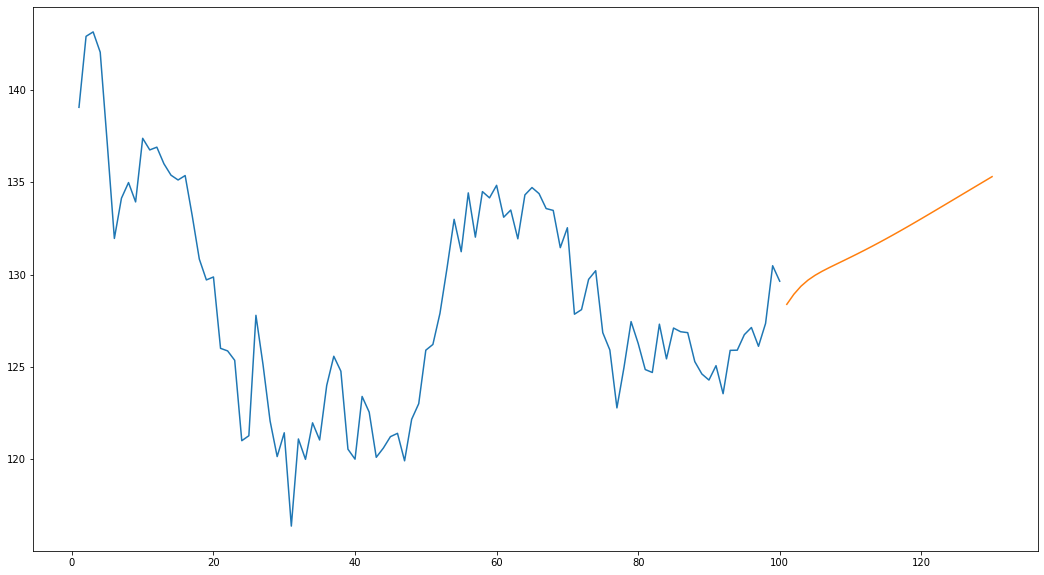

In [ ]:
plt.figure(figsize=(18, 10))
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

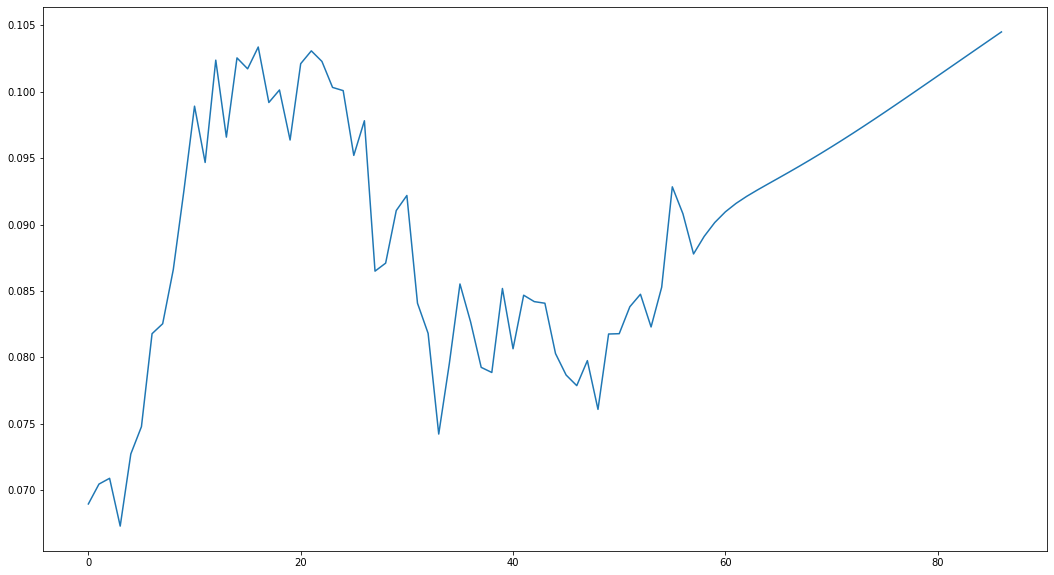

In [ ]:
plt.figure(figsize=(18, 10))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


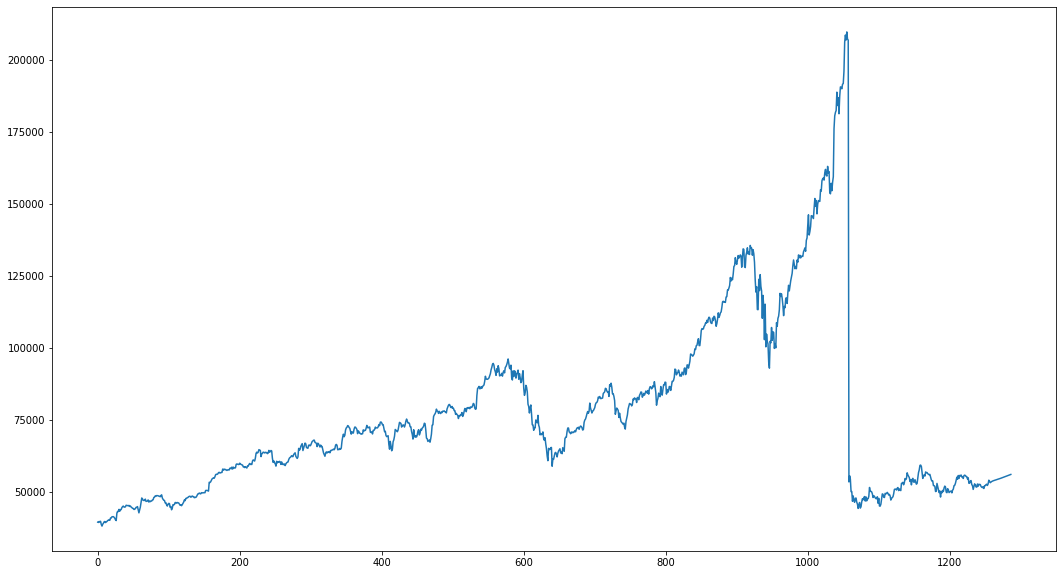

In [ ]:
plt.figure(figsize=(18, 10))
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)